## H1N1 VACCINE PREDICTION

#### PROJECT OVERVIEW
The goal of this project is to predict whether individuals received the H1N1 flu vaccine based on data collected from the National 2009 H1N1 Flu Survey. By analyzing various features from the dataset, we aim to build a predictive model that can identify the likelihood of someone having received the H1N1 vaccine. This information is valuable for public health officials seeking to understand vaccine uptake patterns and tailor future vaccination campaigns.


#### PROBLEM STATEMENT
Given a dataset containing demographic, behavioral, and opinion-related information from respondents of the National 2009 H1N1 Flu Survey, the task is to develop a predictive model to determine whether a respondent received the H1N1 flu vaccine. This is a binary classification problem where the target variable is the receipt of the H1N1 vaccine, categorized as either 'Yes' or 'No'.

The dataset includes various features such as age, gender, income level, health status, exposure risk, and attitudes towards vaccination. The challenge lies in effectively utilizing these features to build a robust model that can accurately classify respondents based on their likelihood of having received the vaccine.

Key objectives include:

Feature Selection and Engineering: Identifying which features are most predictive of vaccine receipt and transforming raw data into meaningful attributes that enhance model performance.
Model Selection: Comparing different classification algorithms (e.g., logistic regression and decision trees) to find the most effective approach.
Performance Evaluation: Assessing the model’s accuracy, precision, recall, and overall effectiveness using appropriate metrics and validation techniques to ensure reliability and generalizability.
Interpretability: Providing insights into how different features contribute to the predictions, which can be valuable for understanding vaccination behavior and informing public health strategies.
The ultimate goal is to create a model that not only predicts vaccine receipt with high accuracy but also offers actionable insights for public health officials to target and improve vaccination efforts, potentially reducing the impact of future flu pandemics.



#### DATA UNDERSTANDING
This particular dataset is part of a competition designed to predict flu vaccination patterns, drawing from the National 2009 H1N1 Flu Survey. The data includes comprehensive details about survey respondents, encompassing their health behaviors, opinions on flu vaccines, and demographic information.
The dataset includes various features related to respondents' backgrounds and behaviors. Key aspects of the dataset may include:
Demographic Information: Age, gender, education level, income, etc.
Health Behaviors: General health status, history of vaccination, frequency of healthcare visits, etc.
Opinions and Attitudes: Attitudes towards vaccines, perceived risk of flu, etc.
Target Variable: H1N1 Vaccine Receipt: Binary variable indicating whether the respondent received the H1N1 vaccine (1 for Yes, 0 for No).

##### Loading the Datasets

In [1]:
#Importing the necessary libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

I started by loading the test dataset and investigating the shape and the statistical properties of the dataset. I also explored the columns and the datatypes.

In [2]:
#loading the test dataset and viewing the first 5 rows
df_test = pd.read_csv(r"C:\Users\hp\Documents\phase3project\Data\test_set_features.csv")
df_test.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [3]:
#viewing the size of the the test data
df_test.shape

#overview of the statistical properties of the test dataset
df_test.describe()

#overview of the structure and datatypes of the test dataset
df_test.info

<bound method DataFrame.info of        respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              26707           2.0             2.0                        0.0   
1              26708           1.0             1.0                        0.0   
2              26709           2.0             2.0                        0.0   
3              26710           1.0             1.0                        0.0   
4              26711           3.0             1.0                        1.0   
...              ...           ...             ...                        ...   
26703          53410           1.0             1.0                        0.0   
26704          53411           3.0             1.0                        0.0   
26705          53412           0.0             1.0                        0.0   
26706          53413           3.0             1.0                        0.0   
26707          53414           2.0             1.0                        0.0

The next step is to load the training data dataset and investigating the structure, statistical overview and datatypes.

In [4]:
#loading the training data and viewing the first 5 rows
df_train = pd.read_csv(r"C:\Users\hp\Documents\phase3project\Data\training_set_features.csv")
df_train.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
#loading the data labels
df_label = pd.read_csv(r"C:\Users\hp\Documents\phase3project\Data\training_set_labels.csv")
df_label

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [6]:
#merging the training datasets
df = pd.merge(df_train, df_label, on="respondent_id")
df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [7]:
#viewing the size of the the train data
df.shape

#overview of the statistical properties of the train dataset
df.describe()

#overview of the structure and datatypes of the train dataset
df.info

<bound method DataFrame.info of        respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0                  0           1.0             0.0                        0.0   
1                  1           3.0             2.0                        0.0   
2                  2           1.0             1.0                        0.0   
3                  3           1.0             1.0                        0.0   
4                  4           2.0             1.0                        0.0   
...              ...           ...             ...                        ...   
26702          26702           2.0             0.0                        0.0   
26703          26703           1.0             2.0                        0.0   
26704          26704           2.0             2.0                        0.0   
26705          26705           1.0             1.0                        0.0   
26706          26706           0.0             0.0                        0.0

### DATA CLEANING
Dealing with the training dataset first

In [8]:
#dropping duplicates in the training datasets
df.drop_duplicates()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [9]:
#defining a function to calculate the percentage of missing values
def missing_values_percentage(df):
    missing_values = []
    for column in df.columns:
        num_missing = df[column].isna().sum()
        total_rows = len(df)
        missing_percent = (num_missing / total_rows) * 100
        missing_values.append(missing_percent)

    missing_df = pd.DataFrame({'Missing Values (%)': missing_values}, index=df.columns)
    return missing_df

In [10]:
#checking the percentage of missing values in the training dataset
missing_percentage = missing_values_percentage(df)
missing_percentage

,Missing Values (%)
respondent_id,0.000000
h1n1_concern,0.344479
h1n1_knowledge,0.434343
behavioral_antiviral_meds,0.265848
behavioral_avoidance,0.778822
behavioral_face_mask,0.071142
behavioral_wash_hands,0.157262
behavioral_large_gatherings,0.325757
behavioral_outside_home,0.307036
behavioral_touch_face,0.479275


Dealing with the test dataset

In [11]:
#dropping duplicates in the dataset
df_test.drop_duplicates()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN


In [12]:
#checking for missing values percentage in the test dataset
missing_test = missing_values_percentage(df_test)
missing_test

,Missing Values (%)
respondent_id,0.000000
h1n1_concern,0.318257
h1n1_knowledge,0.456792
behavioral_antiviral_meds,0.295792
behavioral_avoidance,0.797514
behavioral_face_mask,0.071140
behavioral_wash_hands,0.149768
behavioral_large_gatherings,0.269582
behavioral_outside_home,0.307024
behavioral_touch_face,0.479257


#### EXPLORATORY DATA ANALYSIS.
Performing EDA to ;
1. EDA provides an opportunity to dive into your dataset, allowing you to grasp its structure, features, and the various types of data it contains. This step lays the groundwork for your entire analysis process.

2. Distribution Analysis: Through EDA, you can examine how your variables are distributed, whether they follow a normal distribution, show skewness, or contain outliers, giving you insights into potential hurdles or adjustments needed in your analysis.

In [13]:
#importing the necessary datasets
import seaborn as sns  
import matplotlib.pyplot as plt
import numpy as np

### BAR PLOT
Creating a bar plot to investigate the distribution of the education level in the dataset

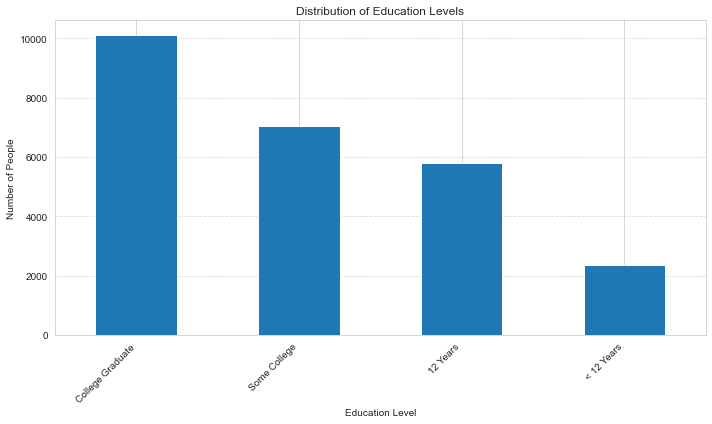

In [14]:
#creating a barplot
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6)) 

df['education'].value_counts().plot(kind='bar', title='Education Distribution')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title("Distribution of Education Levels")
plt.xlabel("Education Level")
plt.ylabel("Number of People")

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

The highest bar corresponds to "College Graduate," indicating that this is the most common education level among the individuals in the dataset.
Decreasing Frequency: As we move from "Some College" to "12 Years" and then to "<< 12 Years," the height of the bars decreases. This suggests that fewer individuals have these lower levels of education.

#### HISTOGRAM 


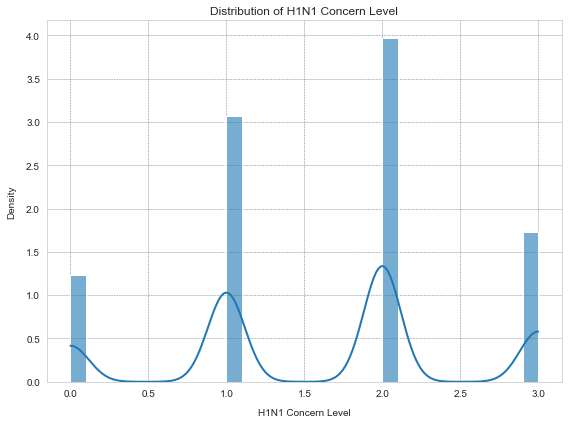

In [15]:
#plotting a histogram with a kde plot
sns.set_style("whitegrid")  
plt.figure(figsize=(8, 6)) 
sns.histplot(
    data=df,
    x="h1n1_concern",
    bins=30, 
    kde=True,
    stat="density",  
    line_kws={"color": "red", "lw": 2},  
    fill=True,  
    alpha=0.6,  
)

plt.xlabel("H1N1 Concern Level", labelpad=10) 
plt.ylabel("Density", labelpad=10)  

plt.title("Distribution of H1N1 Concern Level")
plt.grid(True, linestyle="--", linewidth=0.5, color="gray", which="both", axis="both")
plt.tight_layout()

plt.show()

From the plot above, it shows that people have different levels of concern about H1N1. Most people have low concern, but some people have high concern. This means that the distribution of concern is not evenly spread out. Instead, it has two peaks.

#### COUNTPLOTS
The count plots are used to show the distribution of h1n1_vaccine and seasonal_vaccine.

In [16]:
#defining a function to create a countplot
def countplot(df, x_var, title):
    sns.set_style("whitegrid")  
    plt.figure(figsize=(8, 6)) 

    sns.countplot(x=x_var, data=df, palette="Set2") 

    plt.xlabel(x_var, labelpad=10)  
    plt.ylabel("Count", labelpad=10)

    plt.title(title)
    plt.xticks(rotation=45, ha="right") 

    plt.grid(True, linestyle="--", linewidth=0.5, color="gray", which="both", axis="both")
    plt.tight_layout()  

    plt.show()

Creating a countplot for h1n1_vaccine:

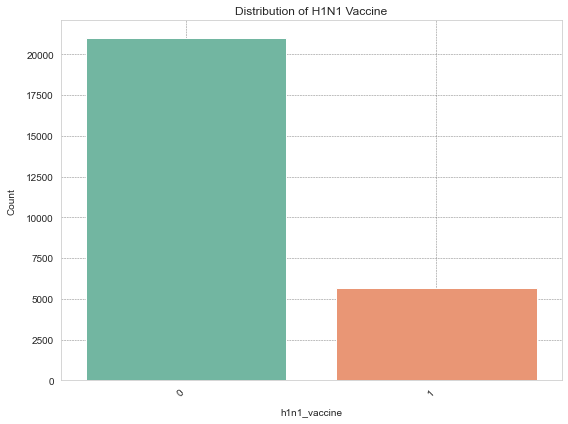

In [17]:
#creating a countplot for h1n1 vaccine
countplot(df, 'h1n1_vaccine', "Distribution of H1N1 Vaccine")

From the above countplot, majority of the people did not receive the H1N1 vaccine. The bar corresponding to '0'(no vaccine) is significantly taller the the bar '1'(received vaccine). This indicates that majority of the individual in this dataset did not receive the H1N1 vaccine.

##### BARPLOT TO INVESTIGATE THE RELATIONSHIP BETWEEN EDUCATION LEVEL AND H1N1 VACCINE UPTAKE

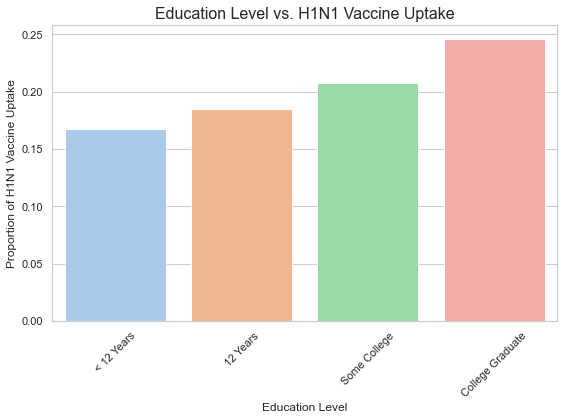

In [19]:
#plotting the bar plot
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(8, 6))
education_order = ['< 12 Years', '12 Years', 'Some College', 'College Graduate']
sns.barplot(x='education', y='h1n1_vaccine', data=df, order=education_order, ci=None)
plt.title('Education Level vs. H1N1 Vaccine Uptake', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Proportion of H1N1 Vaccine Uptake', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar plot illustrates the relationship between education level and the proportion of individuals who received the H1N1 vaccine.
Individuals with a college graduate degree have the highest proportion of H1N1 vaccine uptake. As education level decreases, the proportion of individuals receiving the vaccine also tends to decrease. There appears to be a noticeable difference in vaccination rates between those with some college education and those with less than 12 years of education.

##### SCATTERPLOT TO INVESTIGATE THE RELATIONSHIP BETWEEN AGE GROUP AND SEX VS H1N1 VACCINE UPTAKE

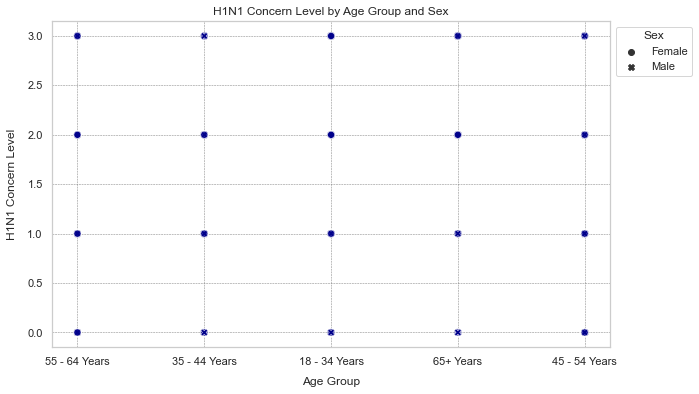

In [20]:
#plotting a scatterplot
sns.set_style("whitegrid")  
plt.figure(figsize=(10, 6))  
ax = sns.scatterplot(
    x="age_group",
    y="h1n1_concern",
    color="darkblue",
    data=df,
    style="sex",  
    s=50,  
    alpha=0.7, 
)
plt.xlabel("Age Group", labelpad=10)  
plt.ylabel("H1N1 Concern Level", labelpad=10)
plt.title("H1N1 Concern Level by Age Group and Sex")
plt.grid(True, linestyle="--", linewidth=0.5, color="gray", which="both", axis="both")
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, title="Sex", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

The scatter plot suggests that age group is a stronger predictor of H1N1 concern than sex, with younger individuals expressing higher levels of concern. There appears to be a general trend where younger age groups (18-34 years) express higher levels of H1N1 concern compared to older age groups (55-64 years and 65+ years).

### DATA PREPROCESSING

In [21]:
#making a copy of the original training and testing dataset
df2_train = df.copy()
df2_test = df_test.copy()

In [22]:
#defining a function to obtain categorical columns
def get_categorical_columns(df):
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    return categorical_columns

In [23]:
#defining a function to obtain numerical columns
def get_numerical_columns(df):
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    return numerical_columns

### HANDLING MISSING VALUES

Filling the missing values in the numerical columns

In [24]:
#defining a function fill missing values in the numerical columns with the median
def clean_numerical_with_median(df, columns):
    for col in columns:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)

    return df

In [25]:
#dealing with the train data
train_numeric = get_numerical_columns(df2_train)

#cleaning numerical data
df2_train = clean_numerical_with_median(df2_train, train_numeric)

In [26]:
#dealing with test data
test_numeric = get_numerical_columns(df2_test)

#cleaning the data
df2_test = clean_numerical_with_median(df2_test, test_numeric)

In [27]:
missing_values_percentage(df2_train)
missing_values_percentage(df2_test)

,Missing Values (%)
respondent_id,0.000000
h1n1_concern,0.000000
h1n1_knowledge,0.000000
behavioral_antiviral_meds,0.000000
behavioral_avoidance,0.000000
behavioral_face_mask,0.000000
behavioral_wash_hands,0.000000
behavioral_large_gatherings,0.000000
behavioral_outside_home,0.000000
behavioral_touch_face,0.000000


From the above, all the numerical columns have 0% of missing values since the missing values were imputed with the median value.
Now, we deal with the categorical data columns:

In [28]:
#importing the necessary library
from sklearn.impute import SimpleImputer

In [29]:
#defining a function to impute with the most frequent
def impute_most_frequent(df):
    imputer = SimpleImputer(strategy='most_frequent')
    df_filled = pd.DataFrame(imputer.fit_transform(df[categorical_cols]), columns=categorical_cols)
    return df_filled

In [30]:
#dealing with the train data 
categorical_cols = get_categorical_columns(df2_train)

#cleaning the columns
df3_train = impute_most_frequent(df2_train[categorical_cols])

In [31]:
#dealing with the train data 
categorical_cols = get_categorical_columns(df2_test)

#cleaning the columns
df3_test = impute_most_frequent(df2_test[categorical_cols])

In [32]:
#checking for any missing values
missing_values_percentage(df3_test)
missing_values_percentage(df3_train)

,Missing Values (%)
age_group,0.0
education,0.0
race,0.0
sex,0.0
income_poverty,0.0
marital_status,0.0
rent_or_own,0.0
employment_status,0.0
hhs_geo_region,0.0
census_msa,0.0


In [33]:
#merging the training datasets
df3_train = pd.merge(df2_train, df3_train)
df3_train

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
1,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
2,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
3,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov,0,0
4,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15022,26695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Rent,Employed,lrircsnp,"MSA, Principle City",0.0,0.0,atmlpfrs,xtkaffoo,0,0
15023,26698,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,atmpeygn,"MSA, Not Principle City",1.0,1.0,dotnnunm,mxkfnird,0,1
15024,26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,pxcmvdjn,xgwztkwe,0,0
15025,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0


In [34]:
#merging the training datasets
df3_test = pd.merge(df2_test, df3_test)


#### ENCODING CATEGORICAL COLUMNS

In [35]:
from sklearn.preprocessing import OneHotEncoder
#TRAINING DATA
# Instantiate the encoder
onehot_encoder = OneHotEncoder(sparse=False, drop='first') 

# Apply the encoder to categorical columns
encoded_data = onehot_encoder.fit_transform(df3_train[categorical_cols])

# Convert to DataFrame and concatenate with the original DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(categorical_cols))
df4_train = pd.concat([df3_train, encoded_df], axis=1).drop(columns=categorical_cols)


In [36]:
from sklearn.preprocessing import OneHotEncoder
#TESTING DATA
# Instantiate the encoder
onehot_encoder = OneHotEncoder(sparse=False, drop='first') 

# Apply the encoder to categorical columns
encoded_data = onehot_encoder.fit_transform(df3_test[categorical_cols])

# Convert to DataFrame and concatenate with the original DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(categorical_cols))
df4_test = pd.concat([df3_test, encoded_df], axis=1).drop(columns=categorical_cols)


#### STANDARDIZING NUMERICAL COLUMNS

In [37]:
#importing the necessary libraries
from sklearn.preprocessing import StandardScaler

#instantiating the standard scaler
scaler = StandardScaler()

#scaling the training data
df4_train[train_numeric] = scaler.fit_transform(df4_train[train_numeric])

In [38]:
#scaling the test data
df4_test[test_numeric] = scaler.fit_transform(df4_test[test_numeric])

In [39]:
#investigating the mean and standard deviation
df4_train.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
count,1.502700e+04,1.502700e+04,1.502700e+04,1.502700e+04,1.502700e+04,1.502700e+04,1.502700e+04,1.502700e+04,1.502700e+04,1.502700e+04,...,15027.000000,15027.000000,15027.000000,15027.000000,15027.000000,15027.000000,15027.000000,15027.000000,15027.000000,15027.000000
mean,6.052404e-17,-3.971890e-17,-1.891376e-16,-5.106716e-17,-6.146972e-17,-7.565505e-18,-3.404477e-17,-3.404477e-17,-1.702239e-17,-5.863266e-17,...,0.037865,0.017236,0.024290,0.023225,0.027550,0.020896,0.069941,0.030745,0.121648,0.015705
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,...,0.190876,0.130153,0.153952,0.150622,0.163686,0.143040,0.255056,0.172631,0.326889,0.124336
min,-1.728576e+00,-1.846251e+00,-2.483268e+00,-2.240049e-01,-1.660629e+00,-2.561123e-01,-2.298873e+00,-6.180997e-01,-5.766587e-01,-1.462351e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.798681e-01,-6.808468e-01,-7.191651e-01,-2.240049e-01,-1.660629e+00,-2.561123e-01,4.349957e-01,-6.180997e-01,-5.766587e-01,-1.462351e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.681836e-03,4.845575e-01,-7.191651e-01,-2.240049e-01,6.021814e-01,-2.561123e-01,4.349957e-01,-6.180997e-01,-5.766587e-01,6.838302e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.731137e-01,4.845575e-01,1.044938e+00,-2.240049e-01,6.021814e-01,-2.561123e-01,4.349957e-01,1.617862e+00,-5.766587e-01,6.838302e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.730241e+00,1.649962e+00,1.044938e+00,4.464187e+00,6.021814e-01,3.904537e+00,4.349957e-01,1.617862e+00,1.734128e+00,6.838302e-01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### MODELLING

##### LOGISTIC REGRESSION

In [40]:
#importing the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

In [63]:
#features
X_train = df4_train.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])

# target for h1n1 vaccine  
y_train_h1n1 = df4_train['h1n1_vaccine'].astype('int') 

#logistic Regression Model for h1n1 vaccine
model_h1n1 = LogisticRegression(random_state=42)
model_h1n1.fit(X_train, y_train_h1n1)



LogisticRegression(random_state=42)

In [42]:
X_test = df4_test
# 2. Make predictions on both training and testing data
pred_train_h1n1 = model_h1n1.predict(X_train)
pred_test_h1n1 = model_h1n1.predict(X_test)

# 3. Evaluate the model's performance on the training data
train_accuracy = accuracy_score(y_train_h1n1, pred_train_h1n1)
print(f"Training Accuracy: {train_accuracy:.4f}")


Training Accuracy: 0.8362


In [64]:
# Align test_data columns with X_train columns
df4_test = df4_test.reindex(columns=X_train.columns, fill_value=0)

# Separate features from the test data (no target variable in test data)
X_test = df4_test

In [70]:
from sklearn.metrics import classification_report

# Make predictions
y_pred_train_log_reg = model_h1n1.predict(X_train)
y_pred_test_log_reg = model_h1n1.predict(X_test)

# Evaluate the model
print("Training Accuracy for Logistic Regression:", accuracy_score(y_train_h1n1, y_pred_train_log_reg))
print("Classification Report for Logistic Regression (Train):\n", classification_report(y_train_h1n1, y_pred_train_log_reg))


Training Accuracy for Logistic Regression: 0.836228122712451
Classification Report for Logistic Regression (Train):
               precision    recall  f1-score   support

           0       0.86      0.93      0.90     11369
           1       0.72      0.54      0.61      3658

    accuracy                           0.84     15027
   macro avg       0.79      0.73      0.76     15027
weighted avg       0.83      0.84      0.83     15027



#### MODEL EVALUATION

In [72]:
#calculating Metrics for h1n1 model- train
accuracy_h1n1 = accuracy_score(y_train_h1n1, y_pred_train_log_reg)
precision_h1n1 = precision_score(y_train_h1n1, y_pred_train_log_reg)
recall_h1n1 = recall_score(y_train_h1n1, y_pred_train_log_reg)
f1_h1n1 = f1_score(y_train_h1n1, y_pred_train_log_reg)


print("H1N1 Vaccine Model(train) - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}".format(accuracy_h1n1, precision_h1n1, recall_h1n1, f1_h1n1))


H1N1 Vaccine Model(train) - Accuracy: 0.8362, Precision: 0.7190, Recall: 0.5372, F1 Score: 0.6149


#### ROC-AUC CURVE FOR H1N1 VACCINE

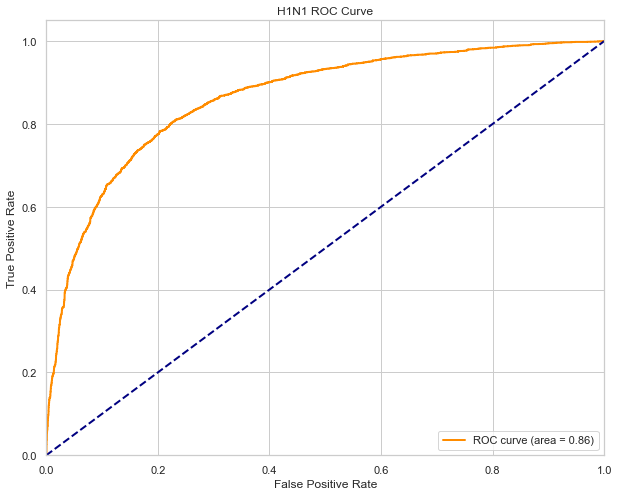

In [73]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities
y_pred_proba_h1n1 = model_h1n1.predict_proba(X_train)[:, 1]

# Calculate the ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_train_h1n1, y_pred_proba_h1n1)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('H1N1 ROC Curve')
plt.legend(loc="lower right")
plt.show()


#### CONFUSION MATRIX

In [74]:
conf_matrix = confusion_matrix(y_train_h1n1, y_pred_train_log_reg)

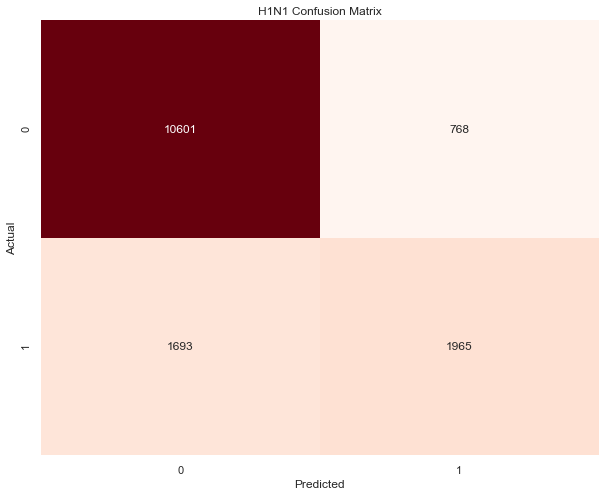

In [75]:
#confusion Matrix Heatmap for h1n1
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title("H1N1 Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### DECISION TREE

In [76]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train_h1n1)

# Make predictions
y_pred_train_dt = decision_tree.predict(X_train)
y_pred_test_dt = decision_tree.predict(X_test)

# Evaluate the model
print("Training Accuracy for Decision Tree:", accuracy_score(y_train_h1n1, y_pred_train_dt))
print("Classification Report for Decision Tree (Train):\n", classification_report(y_train_h1n1, y_pred_train_dt))


Training Accuracy for Decision Tree: 1.0
Classification Report for Decision Tree (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11369
           1       1.00      1.00      1.00      3658

    accuracy                           1.00     15027
   macro avg       1.00      1.00      1.00     15027
weighted avg       1.00      1.00      1.00     15027



In [ ]:
# 1. Confusion Matrix for the Test Set
conf_matrix = confusion_matrix(y_test_h1n1, y_pred_test_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Decision Tree (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()